Histogram matching function

In [1]:
import SimpleITK as sitk
from metadata import ImageDataset, patient
import matplotlib.pyplot as plt
import numpy as np

im_data = ImageDataset('Training')
#check length
print(f'len: {im_data.len}')
#get all ids (useful to iterate over all adataset)
print(f'all ids: {im_data.IDs}')
#get list of all images paths for training
print(f'images paths: {im_data.im_paths()}')
#same for the labels
print(f'images paths: {im_data.labels_paths()}')

id = im_data.IDs[0]
print(f'selected id: {id}')
#istantiate patient object using the id and the previous ImageDataset object
pat = patient(id, im_data)

im = pat.im()
labels = pat.labels()

len: 10
all ids: ['01', '03', '04', '05', '06', '07', '08', '09', '16', '18']
images paths: ['data\\Training_Set\\IBSR_01\\IBSR_01.nii.gz', 'data\\Training_Set\\IBSR_03\\IBSR_03.nii.gz', 'data\\Training_Set\\IBSR_04\\IBSR_04.nii.gz', 'data\\Training_Set\\IBSR_05\\IBSR_05.nii.gz', 'data\\Training_Set\\IBSR_06\\IBSR_06.nii.gz', 'data\\Training_Set\\IBSR_07\\IBSR_07.nii.gz', 'data\\Training_Set\\IBSR_08\\IBSR_08.nii.gz', 'data\\Training_Set\\IBSR_09\\IBSR_09.nii.gz', 'data\\Training_Set\\IBSR_16\\IBSR_16.nii.gz', 'data\\Training_Set\\IBSR_18\\IBSR_18.nii.gz']
images paths: ['data\\Training_Set\\IBSR_01\\IBSR_01_seg.nii.gz', 'data\\Training_Set\\IBSR_03\\IBSR_03_seg.nii.gz', 'data\\Training_Set\\IBSR_04\\IBSR_04_seg.nii.gz', 'data\\Training_Set\\IBSR_05\\IBSR_05_seg.nii.gz', 'data\\Training_Set\\IBSR_06\\IBSR_06_seg.nii.gz', 'data\\Training_Set\\IBSR_07\\IBSR_07_seg.nii.gz', 'data\\Training_Set\\IBSR_08\\IBSR_08_seg.nii.gz', 'data\\Training_Set\\IBSR_09\\IBSR_09_seg.nii.gz', 'data\\Trainin

In [2]:
ref_id = im_data.IDs[8]
print(f'selected id: {id}')

# create a patient object
pat_ref = patient(ref_id, im_data)

# Get the image and the labels
im_ref = pat_ref.im()
labels_ref = pat_ref.labels()

selected id: 01


In [18]:
def histogram_matching(image, reference_image):
    """Performs histogram matching between two images

    Args:
        image (SimpleITK.Image): image to be matched
        reference_image (SimpleITK.Image): reference image

    Returns:
        SimpleITK.Image: matched image
    """
    #Set up the histogram matching filter
    matching = sitk.HistogramMatchingImageFilter()
    matching.ThresholdAtMeanIntensityOn()

    # Perform histogram matching
    matched_image = matching.Execute(image,reference_image)
    return matched_image

matched_image = histogram_matching(im, im_ref)

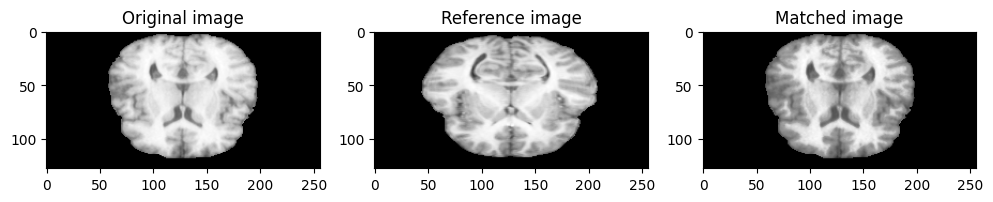

In [19]:
# Show the results
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(sitk.GetArrayFromImage(im)[135, :, :], cmap=plt.cm.Greys_r)
axes[0].set_title('Original image')
axes[1].imshow(sitk.GetArrayFromImage(im_ref)[135, :, :], cmap=plt.cm.Greys_r)
axes[1].set_title('Reference image')
axes[2].imshow(sitk.GetArrayFromImage(matched_image)[135, :, :], cmap=plt.cm.Greys_r)
axes[2].set_title('Matched image')
plt.show()

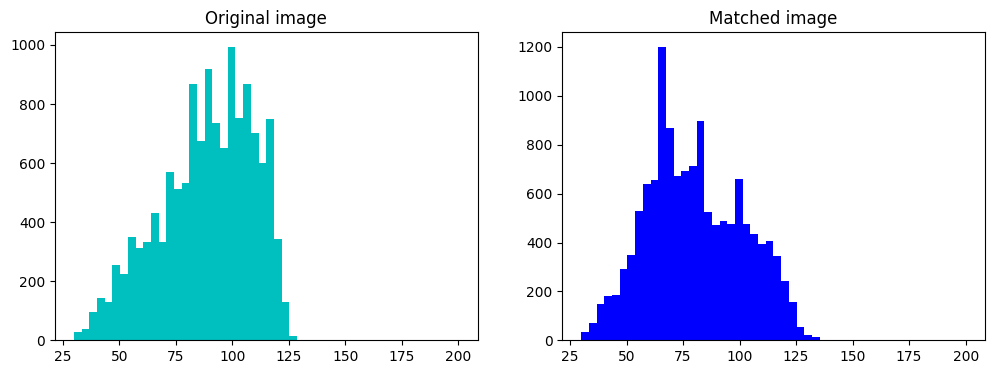

In [17]:
# show the historam in a specific range of intensities
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(sitk.GetArrayFromImage(im)[135, :, :].ravel(), bins=50, color='c', range=(30, 200))
axes[0].set_title('Original image')
axes[1].hist(sitk.GetArrayFromImage(matched_image)[135, :, :].ravel(), bins=50, color='b', range=(30, 200))
axes[1].set_title('Matched image')
plt.show()